## Regresión Polinomial en el *dataset* de las casas de Boston

**En este cuaderno hacemos un estudio comparativo de la precisión de la regresión lineal y la regresión polinómica en el conjunto de datos de viviendas de Boston**

Estos datos formaban originalmente parte del repositorio de aprendizaje automático de UCI y ahora se han eliminado. Estos datos también se incluyen con la biblioteca scikit-learn.
Hay 506 registros y 13 variables en este conjunto de datos. El objetivo es predecir el valor de los precios de la casa utilizando las variables dadas.

La descripción de todas las variables se proporciona a continuación:

   **CRIM**: Tasa de criminalidad per cápita por ciudad

   **ZN**: Proporción de terreno residencial zonificado para lotes de más de 25000 pies cuadrados

   **INDUS**: Proporción de acres de negocios no minoristas por ciudad

   **CHAS**: Variable ficticia del río Charles (= 1 si el tramo limita con el río; 0 en caso contrario)

   **NOX**: Concentración de óxido nítrico (partes por 10 millones)

   **RM**: Número medio de habitaciones por vivienda

   **AGE**: Proporción de unidades ocupadas por sus propietarios construidas antes de 1940

   **DIS**: Distancias ponderadas a cinco centros de empleo de Boston

   **RAD**: Índice de accesibilidad a carreteras radiales

   **IMPUESTO**: Tasa de impuesto a la propiedad de valor total por $10,000

   **B**: 1000(Bk - 0,63)², donde Bk es la proporción de [personas de ascendencia afroamericana] por ciudad

   **LSTAT**: Porcentaje de estatus inferior de la población

   **MEDV**: Valor medio de viviendas ocupadas por sus propietarios en miles de dólares

**Importamos las librerías necesarias**

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import math

**Cargamos el *dataset* de las casas de Boston**

In [33]:
df = pd.read_csv('data/BostonHousing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


**Preprocesamiento de datos**

Comprobad datos ausentes en todas las columnas

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


**Visualización de datos**

In [35]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**Matriz de correlaciones**

Analizar la matriz de correlaciones. Trazar un mapa de calor

* ¿Cuáles son las columnas que están más correlacionadas con **medv**?
* Hay dos variables altamente correlacionadas. Identificalas y elimina una de ellas para evitar multicolinealidad.

In [36]:
df.corr(numeric_only=True)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


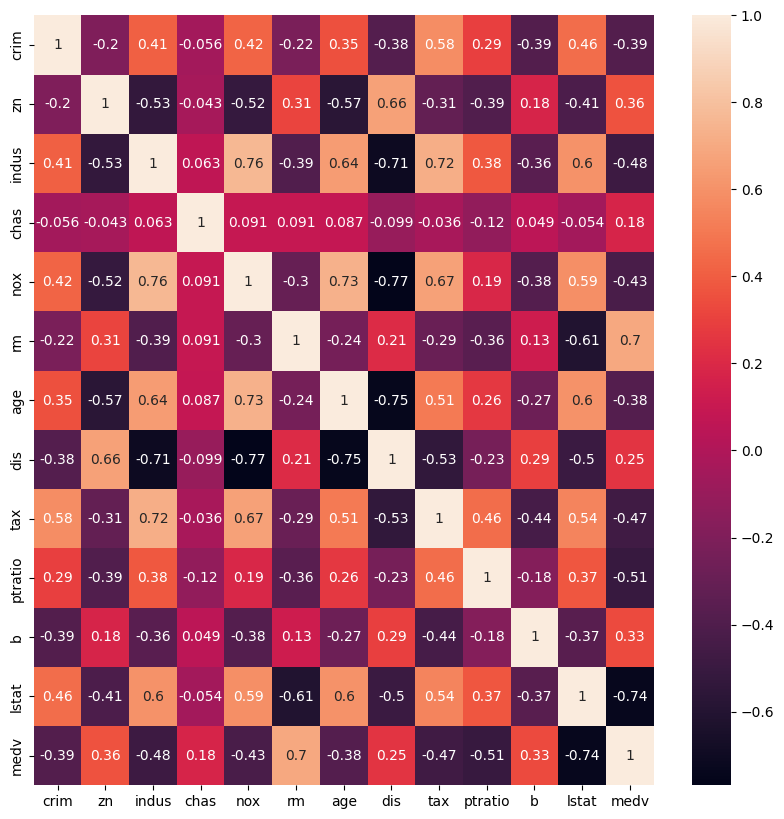

In [73]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(numeric_only=True), annot=True);

* LSTAT y RM son las variables más correladas con la variable objetivo.

In [38]:
df.corr(numeric_only=True)[abs(df.corr(numeric_only=True)) >= 0.6]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.625505,NaN,NaN,NaN,NaN,NaN
zn,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.664408,NaN,NaN,NaN,NaN,NaN,NaN
indus,NaN,NaN,1.000000,NaN,0.763651,NaN,0.644779,-0.708027,NaN,0.720760,NaN,NaN,0.603800,NaN
chas,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nox,NaN,NaN,0.763651,NaN,1.000000,NaN,0.731470,-0.769230,0.611441,0.668023,NaN,NaN,NaN,NaN
rm,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,-0.613808,0.695360
age,NaN,NaN,0.644779,NaN,0.731470,NaN,1.000000,-0.747881,NaN,NaN,NaN,NaN,0.602339,NaN
dis,NaN,0.664408,-0.708027,NaN,-0.769230,NaN,-0.747881,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
rad,0.625505,NaN,NaN,NaN,0.611441,NaN,NaN,NaN,1.000000,0.910228,NaN,NaN,NaN,NaN
tax,NaN,NaN,0.720760,NaN,0.668023,NaN,NaN,NaN,0.910228,1.000000,NaN,NaN,NaN,NaN


In [39]:
df.drop('rad', axis=1, inplace=True)
df

,crim,zn,indus,chas,nox,rm,age,dis,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,273,21.0,393.45,6.48,22.0


### Dibuje 2 diagramas de dispersión para ver la relación entre **MEDV** y **LSTAT** y **RM**

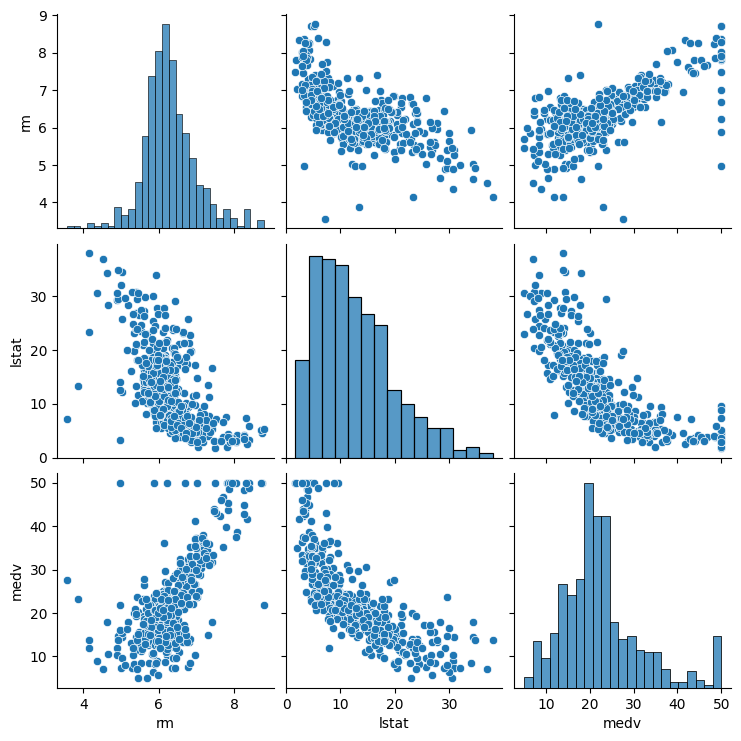

In [42]:
sns.pairplot(df[['rm','lstat','medv']]);

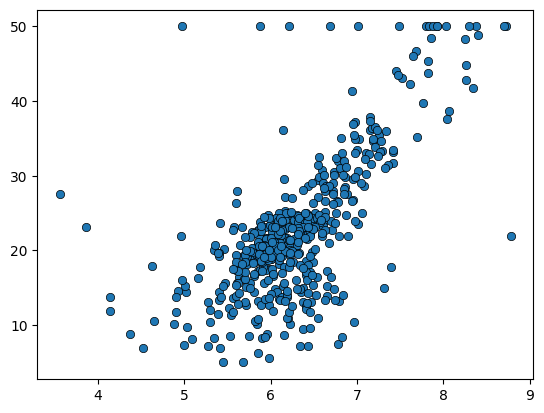

In [45]:
fig, ax = plt.subplots()
ax.scatter(df['rm'], df['medv'], edgecolors = "black", linewidths = 0.5)
plt.show()

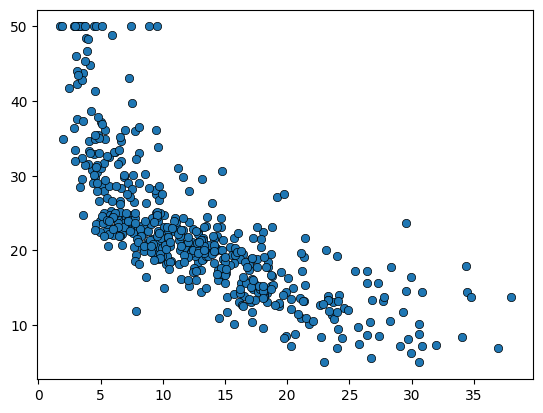

In [46]:
fig, ax = plt.subplots()
ax.scatter(df['lstat'], df['medv'], edgecolors = "black", linewidths = 0.5)
plt.show()

**Prepare the data for training**

Create a dataframe X including **LSTAT** and **RM** columns.
Y should be a pandas series including target values **'MEDV'**



**Preparar los datos para el entrenamiento**

Cree un *DataFrame* *X* que incluya las columnas **LSTAT** y **RM**.
*y* debería ser una serie de pandas que incluya los valores de **'MEDV'**.

In [89]:
X = df[['rm', 'lstat']]
y = df['medv']

**Dividir los datos en conjuntos de *train* y *test***

Divide el conjunto de datos de *train* y *test* en 80% - 20%. Asigne random_state a cualquier valor. Esto asegura la coherencia. Imprime las dimensiones de los objetos resultantes.

In [90]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size = 0.2, random_state=10)

In [91]:
print(Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape)

(404, 2) (102, 2) (404,) (102,)


## **Regresión Lineal**

Construya un modelo de regresión lineal con sklearn LinearRegression.
Usaremos el error cuadrático medio y la puntuación R2 para evaluar nuestro modelo, así que asegúrese de realizar las importaciones necesarias.

Importe las funciones necesarias y entrene un modelo de Regresión Lineal.

In [92]:
lm = LinearRegression()
lm.fit(Xtrain, ytrain)

predictions = lm.predict(Xtest)

print("R2:", lm.score(Xtrain, ytrain))
print("MAE:", mean_absolute_error(ytest, predictions))
print("MAPE:", mean_absolute_percentage_error(ytest, predictions))
print("MSE:", mean_squared_error(ytest, predictions))
print("RMSE:", math.sqrt(mean_squared_error(ytest, predictions)))

R2: 0.6363353379616082
MAE: 4.582645892343419
MAPE: 0.1965019924576172
MSE: 41.40202341152383
RMSE: 6.434440411684906


**Evaluar el rendimiento del modelo en los conjuntos de *train* y *test***

In [94]:
evaluation = pd.DataFrame()
evaluation['Predictions'] = predictions
evaluation['Real'] = list(ytest)

evaluation

,Predictions,Real
0,26.341431,28.4
1,29.827371,31.1
2,27.814370,23.5
3,29.854272,26.6
4,17.992825,19.6
...,...,...
97,19.971893,24.4
98,22.501368,22.6
99,23.425060,19.8
100,23.630172,22.2


**Veamos visualmente el rendimiento del modelo. Visualicemos y_test vs y_pred**

Lo ideal debería haber sido una línea recta.

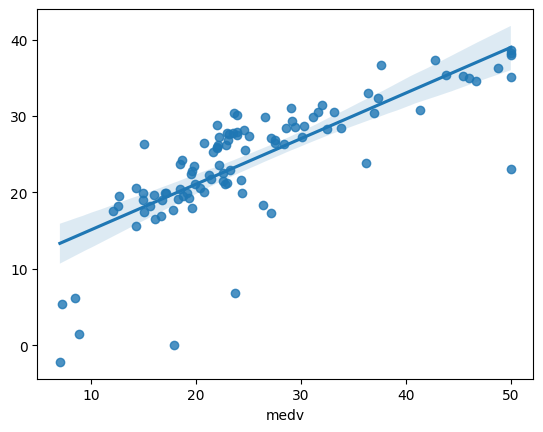

In [96]:
sns.regplot(x = ytest, y = predictions);

## **Regresión Polinómica**

Podemos ver que **LSTAT** no varía exactamente de forma lineal. Apliquemos la regresión polinómica con **grado 2** y probemos.

Para generar grados de orden superior, utilizamos la clase PolyniomialFeatures de la biblioteca sklearn.

In [104]:
pol_f = PolynomialFeatures(degree = 2)
pol_f.fit(X)
X_pol = pol_f.transform(X)
X_pol

array([[ 1.      ,  6.575   ,  4.98    , 43.230625, 32.7435  , 24.8004  ],
       [ 1.      ,  6.421   ,  9.14    , 41.229241, 58.68794 , 83.5396  ],
       [ 1.      ,  7.185   ,  4.03    , 51.624225, 28.95555 , 16.2409  ],
       ...,
       [ 1.      ,  6.976   ,  5.64    , 48.664576, 39.34464 , 31.8096  ],
       [ 1.      ,  6.794   ,  6.48    , 46.158436, 44.02512 , 41.9904  ],
       [ 1.      ,  6.03    ,  7.88    , 36.3609  , 47.5164  , 62.0944  ]])

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X_pol,y, test_size = 0.2, random_state=10)

In [106]:
pol_reg = LinearRegression()
pol_reg.fit(X_train, y_train)
predictions1 = pol_reg.predict(X_test)

**¿Mejoraron los resultado usando el modelo polinómico?**

In [107]:
print("R2:", pol_reg.score(X_train, y_train))
print("MAE:", mean_absolute_error(y_test, predictions1))
print("MAPE:", mean_absolute_percentage_error(y_test, predictions1))
print("MSE:", mean_squared_error(y_test, predictions1))
print("RMSE:", math.sqrt(mean_squared_error(y_test, predictions1)))

R2: 0.7526744600340032
MAE: 3.5422408760579587
MAPE: 0.1576277377388527
MSE: 26.301979732039957
RMSE: 5.128545576675707


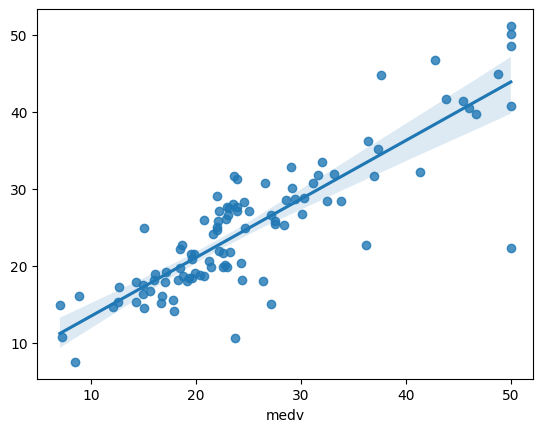

In [108]:
sns.regplot(x = y_test, y = predictions1);

In [109]:
evaluation1 = pd.DataFrame()
evaluation1['Predictions'] = predictions1
evaluation1['Real'] = list(y_test)

evaluation1

,Predictions,Real
0,25.346964,28.4
1,30.672999,31.1
2,27.947253,23.5
3,30.676110,26.6
4,18.346933,19.6
...,...,...
97,18.157147,24.4
98,21.655669,22.6
99,21.456706,19.8
100,21.938468,22.2


**¿Mejoraron los resultados usando el modelo Polinómico con grado 3? ¿O más?**

In [110]:
pol_f = PolynomialFeatures(degree = 3)
pol_f.fit(X)
X_pol = pol_f.transform(X)
print(X_pol[0])

[  1.           6.575        4.98        43.230625    32.7435
  24.8004     284.24135938 215.2885125  163.06263    123.505992  ]


In [112]:
X_train, X_test, y_train, y_test = train_test_split(X_pol,y, test_size = 0.2, random_state=10)

In [113]:
pol_reg = LinearRegression()
pol_reg.fit(X_train, y_train)
predictions1 = pol_reg.predict(X_test)

In [114]:
print("R2:", pol_reg.score(X_train, y_train))
print("MAE:", mean_absolute_error(y_test, predictions1))
print("MAPE:", mean_absolute_percentage_error(y_test, predictions1))
print("MSE:", mean_squared_error(y_test, predictions1))
print("RMSE:", math.sqrt(mean_squared_error(y_test, predictions1)))

R2: 0.7688165765778625
MAE: 3.542002179082297
MAPE: 0.15369222231927177
MSE: 26.096535312415256
RMSE: 5.10847680942326


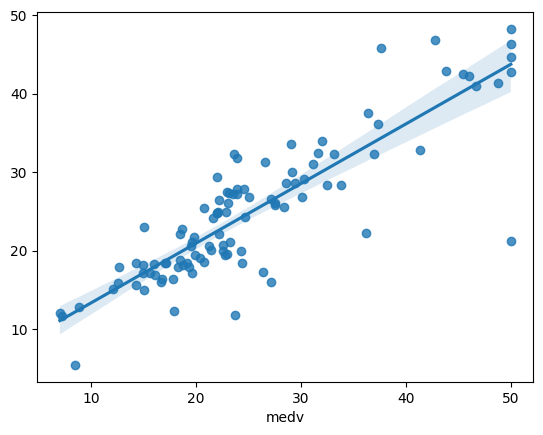

In [115]:
sns.regplot(x = y_test, y = predictions1);

In [116]:
evaluation1 = pd.DataFrame()
evaluation1['Predictions'] = predictions1
evaluation1['Real'] = list(y_test)

evaluation1

,Predictions,Real
0,25.545332,28.4
1,31.033137,31.1
2,27.244643,23.5
3,31.224047,26.6
4,17.094066,19.6
...,...,...
97,18.473674,24.4
98,20.689520,22.6
99,21.789792,19.8
100,22.071355,22.2
